## 210806 회의록

- 회의 목표  :  주제 선정 

- 주제 : 코로나 접종 현황에 따른 소비 패턴 변화!
- 전제 : 월 별 접종 현황을 나누고

- 전국 코로나 접종 현황 따른 변화 
  - 소비내역 분석
  - 이동량 변화 (카드내역, 대중교통, 통신사)
  - 확산 (대구/ 여름 / 연말 )  /  제 4차 확산  (백신차이)

In [5]:
import requests
from bs4 import BeautifulSoup

import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all" 

In [6]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 1. 일일 접종현황 ~ 

In [379]:
vaccinated = pd.read_csv('./Data/owid-covid-data.csv')

In [380]:
vaccinated_kor = vaccinated[vaccinated['iso_code']=='KOR']

In [381]:
vaccinated_kor = vaccinated_kor.reset_index(drop=True)

In [382]:
vaccinated_kor = vaccinated_kor.loc[:,['date',
                      'people_vaccinated',
                      'people_fully_vaccinated']]


vaccinated_kor = vaccinated_kor.dropna()

In [383]:
#str형태 날짜 다루기 쉽게 int로 변경
date_list = []
for i in vaccinated_kor['date']:
    date = i.replace('-',"")
    date_list.append(date)


vaccinated_kor['date']=date_list

vaccinated_kor = vaccinated_kor.rename(columns={"date":'날짜',
                               "people_vaccinated":'전체접종',
                               "people_fully_vaccinated":'2차접종'})


In [384]:
vaccinated_kor = vaccinated_kor.reset_index(drop=True)

In [385]:
first_vc = []
for i in range(144):
    first_vc.append(vaccinated_kor['전체접종'][i] - vaccinated_kor['2차접종'][i])

In [386]:
vaccinated_kor['1차접종'] = first_vc
vaccinated_kor = vaccinated_kor[['날짜','1차접종','2차접종','전체접종']]
#vaccinated_kor = vaccinated_kor.astype(int)

In [398]:
vaccinated_kor

,날짜,1차접종,2차접종,전체접종
0,20210320,681224.0,313.0,681537.0
1,20210321,680944.0,593.0,681537.0
2,20210322,684324.0,883.0,685207.0
3,20210323,705472.0,1498.0,706970.0
4,20210324,734784.0,2692.0,737476.0
...,...,...,...,...
139,20210806,13105480.0,7683371.0,20788851.0
140,20210807,13191006.0,7719219.0,20910225.0
141,20210808,13216416.0,7721457.0,20937873.0
142,20210809,13479011.0,7894715.0,21373726.0


<Figure size 720x720 with 0 Axes>

Text(0.5, 0, '접종일자')

Text(0, 0.5, '접종률')

([<matplotlib.axis.XTick at 0x1ca01f077f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

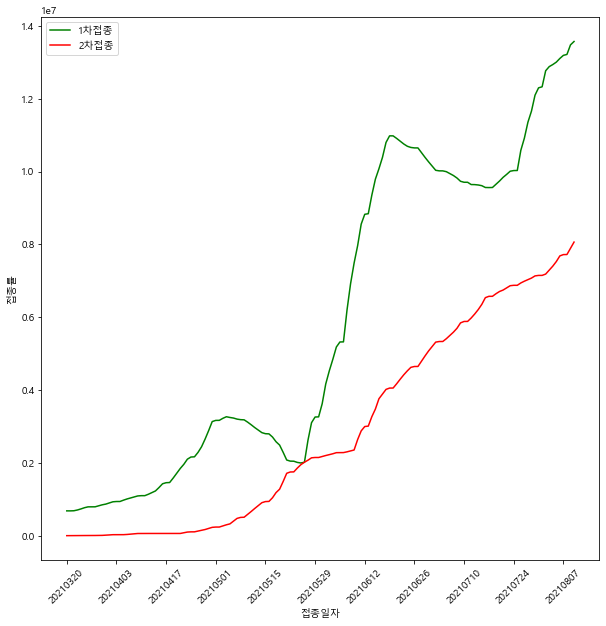

In [399]:
plt.figure(figsize=(10,10))
plt.plot(vaccinated_kor['날짜'], vaccinated_kor['1차접종'], color='green', label='1차접종')
plt.plot(vaccinated_kor['날짜'], vaccinated_kor['2차접종'], color='red',label='2차접종')

plt.xlabel('접종일자')
plt.ylabel('접종률')
plt.xticks([vaccinated_kor['날짜'][14*i] for i in range(11)],rotation=45)
plt.legend(loc='best')